# **Convolutional Encoder-Decoder Network for Image Restoration (MNIST Dataset)**
This mini-project aims to see how the convolutional autoencoder performs the noise removal on the noisy image. We have used the MNIST dataset with Gaussian noise.



## **Import Libaries**

In [ ]:
#Keras is a free open source Python library for developing and evaluating deep learning models. 
import keras
# Keras module provides the MNIST dataset
from keras.datasets import mnist
from keras import layers
from keras.layers import Reshape
from keras.callbacks import TensorBoard
from keras import callbacks
# Numpy library is used for working with arrays
import numpy as np
# Math library is used foe mathematical task
import math
# Matplotlib is used for data visualization
import matplotlib.pyplot as plt
# Skimage is used for image processing task
from skimage.measure import compare_ssim as ssim

## **Data Load and Pre-processing**


In [ ]:
#loading the MNIST dataset
(train, _), (test, _) = mnist.load_data()
max = 255.
train = train.astype('float32') / max
test = test.astype('float32') / max
#image reshape
x = len(train)
y = len(test)
train = np.reshape(train, (x, 28, 28, 1))
test = np.reshape(test, (y, 28, 28, 1))

# 0 is the mean of the normal distribution we are choosing from
# 1 is the standard deviation of the normal distribution
# size of train and test data is the number of elements we get in array noise
# gaussian noise into the images
noise_factor = 0.1
dummyVartrain = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train.shape) 
dummyVartest = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test.shape) 
train_noisy = train + dummyVartrain
test_noisy = test + dummyVartest

#Given an interval, values outside the interval are clipped to the interval edges. 
#For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)
print(train_noisy.shape)
print(test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## **Noisy image Visualization**

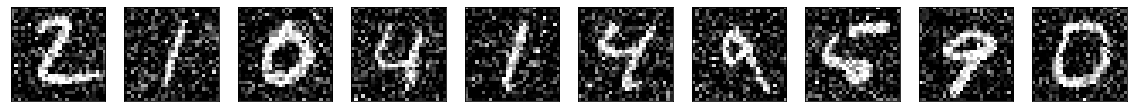

In [ ]:
# visualizing the nosisy image
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    axis = plt.subplot(1, n, i)
    plt.imshow(test_noisy[i].reshape(28, 28))
    plt.gray()
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
plt.show()

## **Model Building**

In [ ]:
#buliding architecture for autoencoder
input_img = keras.Input(shape=(28, 28, 1))
#enoder
#convolutional layer with 32 3x3 filter
#activation function Relu and Same padding
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
#Downsample the input
x = layers.MaxPooling2D((2, 2), padding='same')(x)
#dropout layer to reduce the overfitting
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
#Upsample the dimension of the input
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#dropout layer to reduce the overfitting
x = layers.Dropout(0.1)(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#autoencoder model
autoencoder = keras.Model(input_img, decoded)
#shows the model summary
autoencoder.summary()
#setting the learning rate 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)
#using binary cross entropy loss funcion and adam optimizer
autoencoder.compile(optimizer= opt, loss='binary_crossentropy', metrics=["accuracy"])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          9248

## **Model Training**

In [ ]:
#setting the early stopping criteria if the loss does not improve in countinous 6 iteration,
#then the model stop traning
callback = callbacks.EarlyStopping(monitor='loss', patience=6)
#Fitting the model for training
#setting epoch size 25 and batch size = 16, and randomly select data for each epoch, one epoch will see all the data 
h = autoencoder.fit(train_noisy, train,
                epochs=25,
                batch_size=16,
                shuffle=True,
                validation_data=(test_noisy, test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False),callback])

Epoch 1/25
3750/3750 [==============================] - 130s 35ms/step - loss: 0.1196 - accuracy: 0.8119 - val_loss: 0.0802 - val_accuracy: 0.8138
Epoch 2/25
3750/3750 [==============================] - 129s 34ms/step - loss: 0.0824 - accuracy: 0.8148 - val_loss: 0.0783 - val_accuracy: 0.8140
Epoch 3/25
3750/3750 [==============================] - 132s 35ms/step - loss: 0.0807 - accuracy: 0.8148 - val_loss: 0.0780 - val_accuracy: 0.8140
Epoch 4/25
3750/3750 [==============================] - 133s 36ms/step - loss: 0.0800 - accuracy: 0.8147 - val_loss: 0.0773 - val_accuracy: 0.8142
Epoch 5/25
3750/3750 [==============================] - 134s 36ms/step - loss: 0.0795 - accuracy: 0.8153 - val_loss: 0.0770 - val_accuracy: 0.8141
Epoch 6/25
3750/3750 [==============================] - 136s 36ms/step - loss: 0.0793 - accuracy: 0.8149 - val_loss: 0.0768 - val_accuracy: 0.8142
Epoch 7/25
3750/3750 [==============================] - 134s 36ms/step - loss: 0.0791 - accuracy: 0.8151 - val_loss: 0

## **Visualizing the Loss graph**

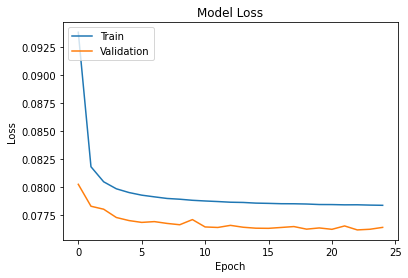

In [ ]:
#Visualizing the grap of training loss and validation loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
#Giving the titel of the graph
plt.title('Model Loss')
#putting the label of the graph
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Visualizing the accuracy graph**

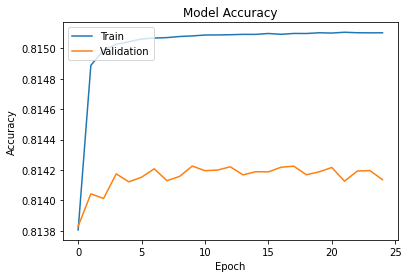

In [ ]:
#Visualizing the grap of training accuracy and validation accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
#Giving the titel of the graph
plt.title('Model Accuracy')
#putting the label of the graph
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Generate Prediction on test data**

In [ ]:
#predict the result on the unseen noisy data
decodedImg = autoencoder.predict(test_noisy)

## **Visualizing the Nosiy image and the generated image**



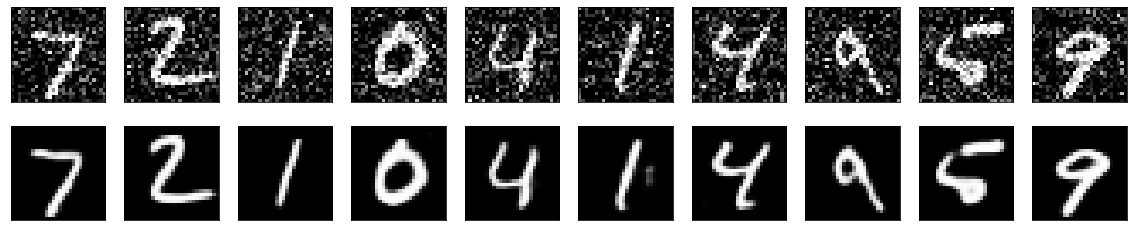

In [ ]:
n = 10  # How many image we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display Noisy image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodedImg[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Visualizing the original image and generated image**

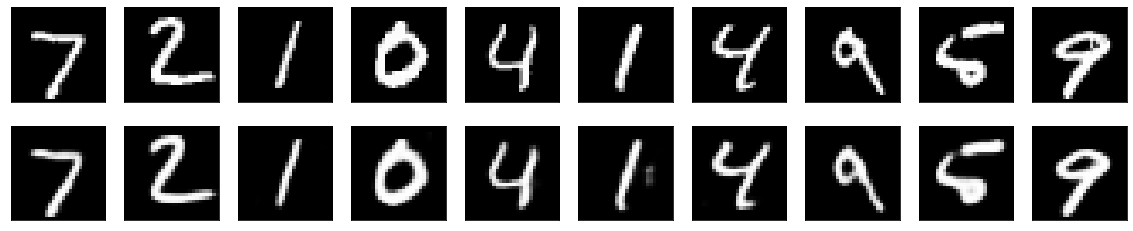

In [ ]:
n = 10  # How many image we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodedImg[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Quality and Similarity Measurement**
We are using PSNR, MSE and SSIM.

### **Define PSNR function**

In [ ]:
#take two images as a input and produce scalar value. The unit is dB.  
def peak_signal_noise_ratio(img1, img2): 
    # assume RGB image
    data1 = img1.astype(float)
    data2 = img2.astype(float)

    #calculating the difference
    diff = data2 - data1

    #make the array dimension into 1
    diff = diff.flatten('C')

    #calculating the root mean square
    rmse = math.sqrt(np.mean(diff ** 2.))
    
    #psnr formula
    psnr = 20 * math.log10(255. / rmse)

    #return the psnr value
    return psnr

### **Define MSE function**

In [ ]:
# define function for mean squared error (MSE)
def mean_square_error(img1, img2):
    # the MSE between the two images is the sum of the squared difference between the two images
    mse = np.sum((img1.astype('float') - img2.astype('float')) ** 2)
    mse /= float(img1.shape[0] * img1.shape[1])

    #return the MSE error
    return mse

### **Comparison function of two images**

In [ ]:
#define the function for comparison
def compareImages(img1, img2):
    value = []
    #PSNR function call
    value.append(peak_signal_noise_ratio(img1, img2))
    #MSE function call
    value.append(mean_square_error(img1, img2))
    #SSIM function call using skimage library
    value.append(ssim(img1, img2, multichannel =True))
    #return the value of PSNR, MSE, and SSIM
    return value

### **Comparing the original and noisy image**

In [ ]:
#orginal vs Noisy
for i in range(10):
  #original image
  orginal = test[i].reshape(28, 28)
  #noisy image
  noisy = test_noisy[i].reshape(28, 28)
  #calling the compare function for measurement
  scores = compareImages(orginal, noisy)
  #printing the scores
  print('PSNR: ',scores[0],'MSE: ', scores[1],'SSIM: ', scores[2])

PSNR:  61.457326218664356 MSE:  0.046488736091674226 SSIM:  0.27480824124244474
PSNR:  61.44560305074465 MSE:  0.046614395411236124 SSIM:  0.3919100164247641
PSNR:  61.137820604651054 MSE:  0.050037810770814 SSIM:  0.13332223617820554
PSNR:  61.20378874053663 MSE:  0.049283493642271255 SSIM:  0.3668381972716083
PSNR:  61.12870551651048 MSE:  0.05014294174668719 SSIM:  0.2405660434372991
PSNR:  61.59923269734186 MSE:  0.04499425767573386 SSIM:  0.14419931552481025
PSNR:  61.400050637069 MSE:  0.047105899063978794 SSIM:  0.29674882283612686
PSNR:  61.43149789918381 MSE:  0.04676603721790447 SSIM:  0.25265984766928484
PSNR:  61.49055193060975 MSE:  0.04613443091576597 SSIM:  0.41307671207102603
PSNR:  61.96652868292005 MSE:  0.04134542805266067 SSIM:  0.37227610216795004


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


### **Comparing the original and generated image**

In [ ]:
#orginal vs generated
for i in range(10):
  #orginal image
  orginal = test[i].reshape(28, 28)
  #restored image
  restored = decodedImg[i].reshape(28, 28)
  #calling copmare function for measurement
  scores = compareImages(orginal, restored)
  #printing the scores
  print('PSNR: ',scores[0],'MSE: ', scores[1],'SSIM: ', scores[2])

PSNR:  72.65258506727331 MSE:  0.0035303832517771384 SSIM:  0.9410810205615824
PSNR:  72.15022791842911 MSE:  0.003963305673939413 SSIM:  0.9517950185478394
PSNR:  75.4903211478988 MSE:  0.001836742377011521 SSIM:  0.9748645540614712
PSNR:  70.305235539327 MSE:  0.006061174772066247 SSIM:  0.9188166729035753
PSNR:  72.14989534592499 MSE:  0.003963609186191296 SSIM:  0.9074521181370258
PSNR:  71.67136975613785 MSE:  0.004425306801834194 SSIM:  0.9014025058257573
PSNR:  71.03777468042543 MSE:  0.005120388256055666 SSIM:  0.9342526372799708
PSNR:  71.42291160288876 MSE:  0.00468585883032718 SSIM:  0.9526507527306952
PSNR:  71.7094776667891 MSE:  0.004386646057611686 SSIM:  0.9315806239608391
PSNR:  70.1232022712827 MSE:  0.006320626588616724 SSIM:  0.9448217030602842


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':


### **Difference between noisy and generate image**

In [ ]:
#Difference Between Noisy and Generated Image
for i in range(10):
  #original image
  original = test[i].reshape(28, 28)
  #noisy image
  noisy = test_noisy[i].reshape(28,28)
  #restored image
  restored = decodedImg[i].reshape(28, 28)
  #calling compare function for measurement
  scores = compareImages(original, restored)
  score = compareImages(original, noisy)
  #printing the scores
  print('Diff. PSNR: ',scores[0]-score[0],'Diff. MSE: ', score[1]-scores[1],'Diff. SSIM: ', scores[2]-score[2])

Diff. PSNR:  11.195258848608951 Diff. MSE:  0.04295835283989709 Diff. SSIM:  0.6662727793191376
Diff. PSNR:  10.704624867684458 Diff. MSE:  0.04265108973729671 Diff. SSIM:  0.5598850021230753
Diff. PSNR:  14.352500543247743 Diff. MSE:  0.048201068393802476 Diff. SSIM:  0.8415423178832657
Diff. PSNR:  9.10144679879037 Diff. MSE:  0.04322231887020501 Diff. SSIM:  0.551978475631967
Diff. PSNR:  11.02118982941451 Diff. MSE:  0.04617933256049589 Diff. SSIM:  0.6668860746997267
Diff. PSNR:  10.072137058795988 Diff. MSE:  0.04056895087389967 Diff. SSIM:  0.7572031903009471
Diff. PSNR:  9.637724043356428 Diff. MSE:  0.04198551080792313 Diff. SSIM:  0.6375038144438439
Diff. PSNR:  9.99141370370495 Diff. MSE:  0.042080178387577286 Diff. SSIM:  0.6999909050614104
Diff. PSNR:  10.21892573617935 Diff. MSE:  0.04174778485815428 Diff. SSIM:  0.518503911889813
Diff. PSNR:  8.156673588362644 Diff. MSE:  0.03502480146404395 Diff. SSIM:  0.5725456008923342


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
